In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Churn_Modelling.csv")

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.shape

(10000, 14)

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
import seaborn as sb
df=df.iloc[:,3:]
c=df.corr(method="pearson")
c

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [11]:
# sb.pairplot(data=df,hue='Exited')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.iloc[:,:-1]

In [14]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
y=df.iloc[:,-1]

In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
x=pd.get_dummies(x, drop_first=True)

In [18]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,train_size=0.8,test_size=0.2)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
x_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]=sc.transform(x_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,1,0,1.106432,0,1,0
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,1,1,-0.748664,1,0,1
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,1,0,1.485335,0,0,0
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,1,0,1.276528,0,1,1
356,2.056114,1.736588,1.044737,0.810193,0.809503,1,1,0.558378,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.582970,-0.656016,-0.339364,0.703104,0.809503,1,1,1.091330,1,0,0
4859,1.478815,-1.613058,-0.339364,0.613060,-0.921591,1,1,0.131760,0,1,0
3264,0.901515,-0.368904,0.006661,1.361474,0.809503,1,0,1.412320,0,0,1
9845,-0.624205,-0.081791,1.390762,-1.215717,0.809503,1,1,0.844321,0,1,0


In [21]:
x_test.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]=sc.transform(x_test.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,-0.552043,-0.368904,1.044737,0.879303,-0.921591,1,1,1.610857,1,0,0
898,-1.314903,0.109617,-1.031415,0.429722,-0.921591,1,0,0.495870,0,0,0
2398,0.571630,0.301026,1.044737,0.308583,-0.921591,1,1,-0.424787,0,1,0
5906,1.416961,-0.656016,-0.339364,0.575336,-0.921591,0,0,-0.187777,0,0,1
2343,0.571630,-0.081791,0.006661,1.389611,0.809503,1,1,0.616842,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,1,1,1.404319,0,0,0
2899,-0.665441,-0.368904,0.698712,-1.215717,0.809503,1,0,-0.511196,0,0,0
9549,-0.747912,-0.273200,-1.377440,1.297455,0.809503,1,0,0.718885,0,1,1
2740,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,1,1,-1.545078,1,0,1


In [22]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [23]:
y_test.value_counts()


0    1595
1     405
Name: Exited, dtype: int64

In [24]:
null_accuracy=(1595/(1595+405))
null_accuracy

0.7975

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

In [26]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [27]:
model.coef_

array([[-0.07225624,  0.75118518, -0.08120735,  0.15447859, -0.08441644,
        -0.05485789, -1.03502961,  0.02917924,  0.82097643,  0.10753487,
        -0.54071955]])

In [28]:
y_pred=model.predict(x_test)

In [29]:
confusion_matrix(y_test,y_pred)

array([[1526,   69],
       [ 309,   96]], dtype=int64)

c:\Users\amria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


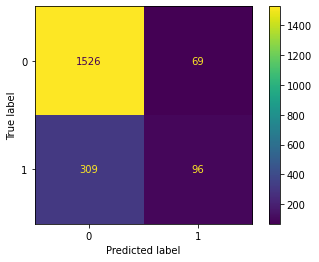

In [30]:
plot_confusion_matrix(model,x_test,y_test)

In [31]:
y_test[30:40]

9547    0
9477    1
4795    0
4747    0
9366    0
5334    0
6652    0
9032    0
580     0
9491    0
Name: Exited, dtype: int64

In [32]:
a=model.predict_proba(x_test)
print(y_test[30:40])
print(a[30:40])


9547    0
9477    1
4795    0
4747    0
9366    0
5334    0
6652    0
9032    0
580     0
9491    0
Name: Exited, dtype: int64
[[0.934548   0.065452  ]
 [0.7306566  0.2693434 ]
 [0.96931083 0.03068917]
 [0.73171475 0.26828525]
 [0.81509918 0.18490082]
 [0.94518949 0.05481051]
 [0.88024446 0.11975554]
 [0.90255618 0.09744382]
 [0.88522801 0.11477199]
 [0.89474698 0.10525302]]


In [33]:
y_pred_new_threshold = (model.predict_proba(x_test)[:,1]>=0.6)

In [34]:
confusion_matrix(y_test,y_pred_new_threshold)

array([[1567,   28],
       [ 353,   52]], dtype=int64)

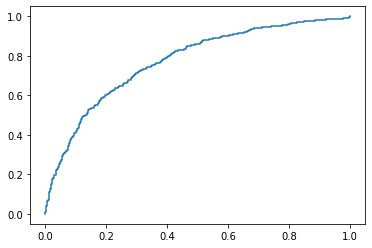

In [35]:
from sklearn.metrics import roc_curve,plot_roc_curve
fpr_array, tpr_array, threshold_array = roc_curve(
    y_true=y_test, y_score=model.predict_proba(x_test)[:,1]
   
)
y_score1=model.predict_proba(x_test)[:,1]
plt.plot(fpr_array, tpr_array)
plt.show()

In [36]:
print(threshold_array)

[1.90440674 0.90440674 0.83724494 0.83566437 0.83225898 0.81733699
 0.8111137  0.81100892 0.78412494 0.78195398 0.75031823 0.74986631
 0.7418039  0.73662043 0.72568391 0.72265828 0.71273095 0.70592499
 0.70188384 0.69797879 0.69503184 0.68755975 0.68502618 0.68327513
 0.68301107 0.67730548 0.66507474 0.66157814 0.66098487 0.65976988
 0.65012064 0.64173256 0.63220621 0.63161747 0.62892218 0.62637553
 0.6209174  0.61342741 0.61136664 0.60633593 0.60336043 0.60264093
 0.59176776 0.59022285 0.58987802 0.58546965 0.57752615 0.57719678
 0.57263505 0.57176979 0.56797985 0.56692962 0.56477614 0.56166038
 0.56160667 0.55807937 0.55712038 0.55598264 0.55152648 0.54319015
 0.54123276 0.53518612 0.53388709 0.53127231 0.52981703 0.52820434
 0.52819803 0.52815308 0.52789935 0.5274713  0.5272122  0.52373569
 0.52314233 0.52307611 0.51753197 0.51609995 0.51607533 0.51500686
 0.51473407 0.5129049  0.51125331 0.51028914 0.50594913 0.50357929
 0.50220103 0.4984593  0.49762936 0.49586538 0.49289142 0.4909

In [37]:
print(fpr_array)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.26959248e-04
 6.26959248e-04 1.25391850e-03 1.25391850e-03 1.88087774e-03
 1.88087774e-03 2.50783699e-03 2.50783699e-03 3.13479624e-03
 3.13479624e-03 4.38871473e-03 4.38871473e-03 5.01567398e-03
 5.01567398e-03 5.64263323e-03 5.64263323e-03 6.89655172e-03
 6.89655172e-03 9.40438871e-03 9.40438871e-03 1.00313480e-02
 1.00313480e-02 1.06583072e-02 1.06583072e-02 1.12852665e-02
 1.12852665e-02 1.19122257e-02 1.19122257e-02 1.25391850e-02
 1.25391850e-02 1.31661442e-02 1.31661442e-02 1.44200627e-02
 1.44200627e-02 1.56739812e-02 1.56739812e-02 1.69278997e-02
 1.69278997e-02 1.75548589e-02 1.75548589e-02 1.81818182e-02
 1.81818182e-02 2.00626959e-02 2.00626959e-02 2.06896552e-02
 2.06896552e-02 2.13166144e-02 2.13166144e-02 2.19435737e-02
 2.19435737e-02 2.25705329e-02 2.25705329e-02 2.31974922e-02
 2.31974922e-02 2.38244514e-02 2.38244514e-02 2.63322884e-02
 2.63322884e-02 2.75862069e-02 2.75862069e-02 2.88401254e-02
 2.88401254e-02 2.946708

In [38]:
print(tpr_array)

[0.         0.00246914 0.00740741 0.00740741 0.00987654 0.00987654
 0.01234568 0.01234568 0.01975309 0.01975309 0.03950617 0.03950617
 0.04197531 0.04197531 0.04938272 0.04938272 0.05185185 0.05185185
 0.05925926 0.05925926 0.06419753 0.06419753 0.06666667 0.06666667
 0.0691358  0.0691358  0.07901235 0.07901235 0.08148148 0.08148148
 0.09135802 0.09135802 0.1037037  0.1037037  0.11111111 0.11111111
 0.11604938 0.11604938 0.11851852 0.11851852 0.12592593 0.12592593
 0.13580247 0.13580247 0.1382716  0.1382716  0.15061728 0.15061728
 0.15802469 0.15802469 0.16296296 0.16296296 0.17283951 0.17283951
 0.17530864 0.17530864 0.17777778 0.17777778 0.18024691 0.18024691
 0.18271605 0.18271605 0.18765432 0.18765432 0.19012346 0.19012346
 0.19259259 0.19259259 0.19506173 0.19506173 0.19753086 0.19753086
 0.2        0.2        0.21728395 0.21728395 0.21975309 0.21975309
 0.22222222 0.22222222 0.22716049 0.22716049 0.23209877 0.23209877
 0.23703704 0.23703704 0.23950617 0.23950617 0.24691358 0.2469

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [40]:

knn = KNeighborsClassifier(n_neighbors = 9)


In [41]:

knn.fit(x_train, y_train)
y_pred_ = knn.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_test, y_pred_)*100)

Accuracy 84.6


In [43]:
confusion_matrix(y_test,y_pred_)

array([[1512,   83],
       [ 225,  180]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.68      0.44      0.54       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [46]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_neighbors': 9}


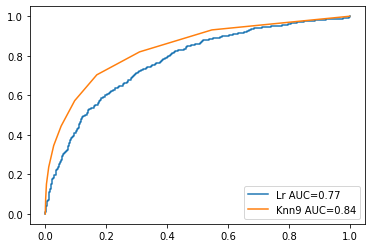

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score  
fpr_array1, tpr_array1, threshold_array1 = roc_curve(
    y_true=y_test, y_score=knn.predict_proba(x_test)[:,1]
)
y_score=knn.predict_proba(x_test)[:,1]

plt.plot(fpr_array,tpr_array,label="Lr AUC={:.2f}".format(roc_auc_score(y_test,y_score1)))
plt.plot(fpr_array1, tpr_array1,label="Knn9 AUC={:.2f}".format(roc_auc_score(y_test,y_score)))
plt.legend(loc="lower right")
plt.show()